<a href="https://colab.research.google.com/github/gulabpatel/Graph_Convolution/blob/main/Part%201%3A%20Graph_Convolution_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blog post: [Gpaph Conv Basics](https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780)

In [ ]:
# Install RDKit, Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0 python=3.6

#Import Rdkit library

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/') 

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

#Draw molecules fom SMILES

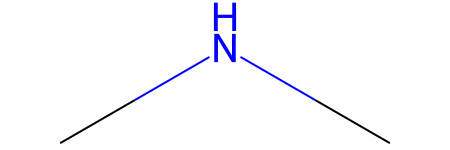

In [ ]:
mol = Chem.MolFromSmiles('CNC')
mol

**Labelling of Atoms**

In [ ]:
def label(mol):
  for i, at in enumerate(mol.GetAtoms()):
    lbl = str(i)
    at.SetProp('atomLabel', lbl)
  return mol

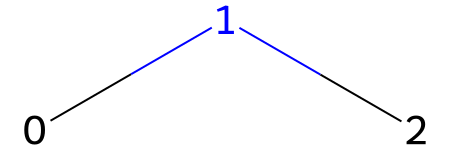

In [ ]:
label(mol)

#Calculate Adjacency Matrix

In [ ]:
A = Chem.GetAdjacencyMatrix(mol)
A

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]], dtype=int32)

**Convert array into matrix**

In [ ]:
A =np.asmatrix(A)
A

matrix([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]], dtype=int32)

In [ ]:
C = [1,0]
N = [0,1]
X = np.array([C, N, C])
X

array([[1, 0],
       [0, 1],
       [1, 0]])

**Mtrix Product**

In [ ]:
A@X   #Matrix product

matrix([[0, 1],
        [2, 0],
        [0, 1]])

**Identity Matrix**

In [ ]:
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
A_hat = A + I
A_hat

matrix([[1., 1., 0.],
        [1., 1., 1.],
        [0., 1., 1.]])

**Matrix Product**

In [ ]:
A_hat@X

matrix([[1., 1.],
        [2., 1.],
        [1., 1.]])

In [ ]:
A_hat

matrix([[1., 1., 0.],
        [1., 1., 1.],
        [0., 1., 1.]])

**Matrix Column Sum**

In [ ]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat

array([2., 3., 2.])

**Diagonal Matrix**

In [ ]:
D_hat = np.matrix(np.diag(D_hat))
D_hat

matrix([[2., 0., 0.],
        [0., 3., 0.],
        [0., 0., 2.]])

In [ ]:
D_hat**-1 *A_hat * X

matrix([[0.5       , 0.5       ],
        [0.66666667, 0.33333333],
        [0.5       , 0.5       ]])

**Square root of inverse of Matrix**

In [ ]:
D_hat_inv = np.sqrt(D_hat**-1)
D_hat_inv

matrix([[0.70710678, 0.        , 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.        , 0.70710678]])

**Symmetric Normalization**

In [ ]:
H = D_hat_inv * A_hat * D_hat_inv * X
H

matrix([[0.5       , 0.40824829],
        [0.81649658, 0.33333333],
        [0.5       , 0.40824829]])

**Generate Random Matrix**

In [ ]:
W = 2*np.random.rand(2,5) - 1 #number ofdescriptors x number of filter 
W = np.asmatrix(W)
W

matrix([[ 0.73262733, -0.30650017, -0.28796672, -0.28462724, -0.76883786],
        [-0.83610636, -0.86927796,  0.9733707 ,  0.18526772, -0.70120239]])

In [ ]:
Z = H * W
Z

matrix([[ 0.02497467, -0.50813133,  0.25339356, -0.06667839, -0.67068361],
        [ 0.31948559, -0.54001566,  0.08933306, -0.17064126, -0.86148761],
        [ 0.02497467, -0.50813133,  0.25339356, -0.06667839, -0.67068361]])

**Relu Activation**

In [ ]:
def relu(x):
  return maximum(0,x)

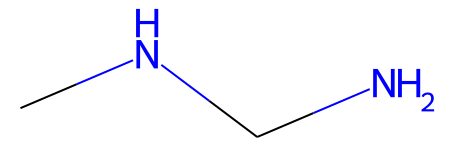

In [ ]:
mol2 = Chem.MolFromSmiles('CNCN')
mol2

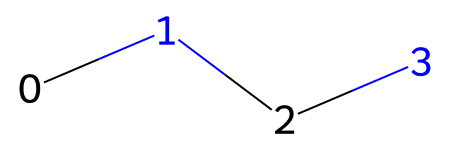

In [ ]:
label(mol2)

In [ ]:
A = Chem.GetAdjacencyMatrix(mol2)
A = np.asmatrix(A)

C = [1, 0]
N = [0, 1]
X = np.array([C, N, C, N])

H1 = A * X
print(H1)

H2 = A*H1
print(H2)

[[0 1]
 [2 0]
 [0 2]
 [1 0]]
[[2 0]
 [0 3]
 [3 0]
 [0 2]]


-------------------------------